In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
cuad_phi_1 = lambda t: 1
cuad_phi_2 = lambda t: t
cuad_phi_3 = lambda t: t**2
cuad_funciones_phi = [cuad_phi_1, cuad_phi_2, cuad_phi_3]

cub_phi_1 = lambda t: 1
cub_phi_2 = lambda t: t
cub_phi_3 = lambda t: t**2
cub_phi_4 = lambda t: t**3
cub_funciones_phi = [cub_phi_1, cub_phi_2, cub_phi_3, cub_phi_4]

exp_phi_1 = lambda t: 1
exp_phi_2 = lambda t: -t
exp_funciones_phi = [exp_phi_1, exp_phi_2]

g = 10
t_f = lambda h0, A_1, A_2: math.sqrt(2*(h0/g)*((A_1**2)/(A_2**2) - 1))
h = lambda h0, valor_tf, t: h0*(1 - t/valor_tf)**2

##Agujero 6mm

###Liquido usado: Te

In [29]:
tiempos_te_6mm = [0.03, 1.27, 2.50, 3.74, 5.00, 6.24, 7.47, 8.71, 9.94, 11.18, 12.41, 13.68, 14.91, 16.15, 17.38, 18.62, 19.85, 21.12, 22.35, 23.59, 24.82, 26.06, 27.32, 28.56, 29.79]
alturas_te_6mm = [56.782, 51.918, 47.475, 42.701, 38.106, 34.322, 30.419, 26.816, 23.271, 20.007, 16.433, 13.971, 11.688, 9.287, 7.454, 5.630, 4.166, 3.723, 2.537, 1.982, 1.561, 1.231, 0.961, 0.736, 0.556]
distancia_te_6mm = 1.24 #±0.02

alturas_normalizadas_te_6mm = []
for altura in alturas_te_6mm:
  alturas_normalizadas_te_6mm.append(altura/alturas_te_6mm[0])

In [30]:
#AJUSTE CUADRATICO

cuad_A_array = np.zeros((3,3))
for i in range(len(cuad_funciones_phi)):
  for j in range(len(cuad_funciones_phi)):
    res = 0
    for t in tiempos_te_6mm:
      res += cuad_funciones_phi[i](t) * cuad_funciones_phi[j](t)
    cuad_A_array[i][j] = res
# print(cuad_A_array)

cuad_b_array = np.zeros((3, 1))
for i in range(len(cuad_funciones_phi)):
  res = 0
  for j in range(len(tiempos_te_6mm)):
    res += alturas_normalizadas_te_6mm[j] * cuad_funciones_phi[i](tiempos_te_6mm[j])
  cuad_b_array[i][0] = res
# print(cuad_b_array)

cuad_c = np.linalg.solve(cuad_A_array, cuad_b_array)
# print(cuad_c)

f_cuadratico = lambda t: cuad_c[0][0] + cuad_c[1][0]*t + cuad_c[2][0]*t**2

cuad_alturas_calculadas_te_6mm = []
for t in tiempos_te_6mm:
  cuad_alturas_calculadas_te_6mm.append(f_cuadratico(t))

cuad_alturas_calculadas_normalizadas_te_6mm = []
for altura in cuad_alturas_calculadas_te_6mm:
  cuad_alturas_calculadas_normalizadas_te_6mm.append(altura/cuad_alturas_calculadas_te_6mm[0])

# print(cuad_alturas_calculadas_normalizadas_te_6mm)

error_cuadratico = 0
m = len(tiempos_te_6mm)
for i in range(len(tiempos_te_6mm)):
  error_cuadratico += (alturas_normalizadas_te_6mm[i] - cuad_alturas_calculadas_normalizadas_te_6mm[i])**2
ecm_cuad_te = math.sqrt(error_cuadratico/m)
print(ecm_cuad_te)

0.006912379262872676


In [31]:
#AJUSTE CUBICO

cub_A_array = np.zeros((4,4))
for i in range(len(cub_funciones_phi)):
  for j in range(len(cub_funciones_phi)):
    res = 0
    for t in tiempos_te_6mm:
      res += cub_funciones_phi[i](t) * cub_funciones_phi[j](t)
    cub_A_array[i][j] = res

# print(cub_A_array)

cub_b_array = np.zeros((4, 1))
for i in range(len(cub_funciones_phi)):
  res = 0
  for j in range(len(tiempos_te_6mm)):
    res += alturas_normalizadas_te_6mm[j] * cub_funciones_phi[i](tiempos_te_6mm[j])
  cub_b_array[i][0] = res
# print(cub_b_array)

cub_c = np.linalg.solve(cub_A_array, cub_b_array)
# print(cub_c)

f_cub = lambda t: cub_c[0][0] + cub_c[1][0]*t + cub_c[2][0]*t**2 + cub_c[3][0]*t**3

cub_alturas_calculadas_te_6mm = []
for t in tiempos_te_6mm:
  cub_alturas_calculadas_te_6mm.append(f_cub(t))

cub_alturas_calculadas_normalizadas_te_6mm = []
for altura in cub_alturas_calculadas_te_6mm:
  cub_alturas_calculadas_normalizadas_te_6mm.append(altura/cub_alturas_calculadas_te_6mm[0])

# print(cub_alturas_calculadas_normalizadas_te_6mm)

error_cuadratico = 0
m = len(tiempos_te_6mm)
for i in range(len(tiempos_te_6mm)):
  error_cuadratico += (alturas_normalizadas_te_6mm[i] - cub_alturas_calculadas_normalizadas_te_6mm[i])**2
ecm_cub_te = math.sqrt(error_cuadratico/m)
print(ecm_cub_te)

0.007210968054950396


In [32]:
#AJUSTE EXPONENCIAL
exp_A_array = np.zeros((2,2))
for i in range(len(exp_funciones_phi)):
  for j in range(len(exp_funciones_phi)):
    res = 0
    for t in tiempos_te_6mm:
      res += exp_funciones_phi[i](t) * exp_funciones_phi[j](t)
    exp_A_array[i][j] = res
# print(exp_A_array)

exp_b_array = np.zeros((2, 1))
for i in range(len(exp_funciones_phi)):
  res = 0
  for j in range(len(tiempos_te_6mm)):
    res += alturas_normalizadas_te_6mm[j] * exp_funciones_phi[i](tiempos_te_6mm[j])
  exp_b_array[i][0] = res
# print(exp_b_array)

exp_c = np.linalg.solve(exp_A_array, exp_b_array)
# print(exp_c)

f_exp = lambda t: np.exp(exp_c[0][0] - exp_c[1][0]*t)
# f_exp = lambda t: exp_c[0][0] - exp_c[1][0]*t

exp_alturas_calculadas_te_6mm = []
for t in tiempos_te_6mm:
  exp_alturas_calculadas_te_6mm.append(f_exp(t))


exp_alturas_calculadas_normalizadas_te_6mm = []
for altura in exp_alturas_calculadas_te_6mm:
  exp_alturas_calculadas_normalizadas_te_6mm.append(altura/exp_alturas_calculadas_te_6mm[0])

# print(exp_alturas_calculadas_normalizadas_te_6mm)

error_cuadratico = 0
m = len(tiempos_te_6mm)
for i in range(len(tiempos_te_6mm)):
  error_cuadratico += (alturas_normalizadas_te_6mm[i] - exp_alturas_calculadas_normalizadas_te_6mm[i])**2
ecm_exp_te = math.sqrt(error_cuadratico/m)
print(ecm_exp_te)

0.3459731239814965


In [33]:
# ESTIMACION ALTURA CON ECUACION 1

h0 = alturas_te_6mm[0]
A_1 = 71.283
A_2 = 5.982
valor_tf = t_f(h0, A_1, A_2)

altura_estimada_te_6mm = []
for i in range(len(tiempos_te_6mm)):
  altura_estimada_te_6mm.append(h(h0, valor_tf, tiempos_te_6mm[i]))
altura_estimada_normalizada_te_6mm = []
for altura in altura_estimada_te_6mm:
  altura_estimada_normalizada_te_6mm.append(altura/altura_estimada_te_6mm[0])

print(altura_estimada_normalizada_te_6mm)

[1.0, 0.938938799105651, 0.8802702433718623, 0.8230403725427995, 0.7668576446005949, 0.7135056382100805, 0.6624841060567079, 0.6129634297314792, 0.5657423298202852, 0.5200529835603425, 0.47663231589132715, 0.4337854358589137, 0.39421135952813596, 0.3562312077720272, 0.3204575636834281, 0.2863087419926052, 0.2543355301461848, 0.2233083809224668, 0.1951817604142839, 0.1687421332272953, 0.1444159449612911, 0.12180764783958828, 0.10080490608389461, 0.08207447340074021, 0.06539530871515215]


In [34]:
#ESTIMACION DE TIEMPO EN VACIAR LA MITAD DEL TANQUE

h0 = alturas_te_6mm[0]
A_1 = 71.283
A_2 = 5.982
buscar_h = 0.5 * h0
t = - t_f(h0, A_1, A_2) * (math.sqrt(buscar_h/h0) - 1)
print(t)

11.720187756694346


In [35]:
#ESTIMACION DE TIEMPO EN VACIAR EL 90% DEL TANQUE

h0 = alturas_te_6mm[0]
A_1 = 71.283
A_2 = 5.982
buscar_h = h0 - 0.9 * h0
t = - t_f(h0, A_1, A_2) * (math.sqrt(buscar_h/h0) - 1)
print(t)

27.361299102664383


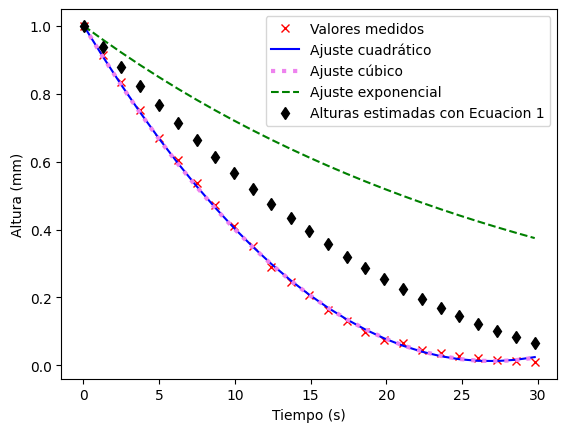

In [38]:
plt.plot(tiempos_te_6mm, alturas_normalizadas_te_6mm, 'x', color='red', label="Valores medidos")
plt.plot(tiempos_te_6mm, cuad_alturas_calculadas_normalizadas_te_6mm, color='blue', label="Ajuste cuadrático")
plt.plot(tiempos_te_6mm, cub_alturas_calculadas_normalizadas_te_6mm, color='violet', linestyle='dotted', label="Ajuste cúbico", linewidth=3)
plt.plot(tiempos_te_6mm, exp_alturas_calculadas_normalizadas_te_6mm, color='green', linestyle='--', label="Ajuste exponencial")
plt.plot(tiempos_te_6mm, altura_estimada_normalizada_te_6mm, 'd', color='black', label="Alturas estimadas con Ecuacion 1")
plt.plot()
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (mm)')
plt.legend()
plt.show()

###Liquido usado: Aceite

In [16]:
tiempos_aceite_6mm = [0.03, 1.20, 2.37, 3.54, 4.70, 5.87, 7.04, 8.21, 9.38, 10.54, 11.71, 12.91, 14.08, 15.25, 16.42, 17.58, 18.75, 19.92, 21.09, 22.25, 23.42, 24.59, 25.76, 26.93, 28.13]
alturas_aceite_6mm = [41.620, 37.972, 34.549, 31.261, 28.197, 25.315, 21.952, 19.279, 17.207, 14.774, 12.642, 10.961, 8.378, 6.696, 5.165, 3.919, 3.033, 2.192, 1.982, 1.577, 1.321, 1.081, 0.661, 0.361, 0.215]
distancia_aceite_6mm = 1.17 #±0.02

alturas_normalizadas_aceite_6mm = []
for altura in alturas_aceite_6mm:
  alturas_normalizadas_aceite_6mm.append(altura/alturas_aceite_6mm[0])

In [17]:
#AJUSTE CUADRATICO

cuad_A_array = np.zeros((3,3))
for i in range(len(cuad_funciones_phi)):
  for j in range(len(cuad_funciones_phi)):
    res = 0
    for t in tiempos_aceite_6mm:
      res += cuad_funciones_phi[i](t) * cuad_funciones_phi[j](t)
    cuad_A_array[i][j] = res
# print(cuad_A_array)

cuad_b_array = np.zeros((3, 1))
for i in range(len(cuad_funciones_phi)):
  res = 0
  for j in range(len(tiempos_aceite_6mm)):
    res += alturas_normalizadas_aceite_6mm[j] * cuad_funciones_phi[i](tiempos_aceite_6mm[j])
  cuad_b_array[i][0] = res
# print(cuad_b_array)

cuad_c = np.linalg.solve(cuad_A_array, cuad_b_array)
# print(cuad_c)

f_cuadratico = lambda t: cuad_c[0][0] + cuad_c[1][0]*t + cuad_c[2][0]*t**2

cuad_alturas_calculadas_aceite_6mm = []
for t in tiempos_aceite_6mm:
  cuad_alturas_calculadas_aceite_6mm.append(f_cuadratico(t))

cuad_alturas_calculadas_normalizadas_aceite_6mm = []
for altura in cuad_alturas_calculadas_aceite_6mm:
  cuad_alturas_calculadas_normalizadas_aceite_6mm.append(altura/cuad_alturas_calculadas_aceite_6mm[0])

# print(cuad_alturas_calculadas_normalizadas_aceite_6mm)

error_cuadratico = 0
m = len(tiempos_aceite_6mm)
for i in range(len(tiempos_aceite_6mm)):
  error_cuadratico += (alturas_normalizadas_aceite_6mm[i] - cuad_alturas_calculadas_normalizadas_aceite_6mm[i])**2
ecm_cuad_aceite = math.sqrt(error_cuadratico/m)
print(ecm_cuad_aceite)

0.008607314531226774


In [18]:
#AJUSTE CUBICO

cub_A_array = np.zeros((4,4))
for i in range(len(cub_funciones_phi)):
  for j in range(len(cub_funciones_phi)):
    res = 0
    for t in tiempos_aceite_6mm:
      res += cub_funciones_phi[i](t) * cub_funciones_phi[j](t)
    cub_A_array[i][j] = res

# print(cub_A_array)

cub_b_array = np.zeros((4, 1))
for i in range(len(cub_funciones_phi)):
  res = 0
  for j in range(len(tiempos_aceite_6mm)):
    res += alturas_normalizadas_aceite_6mm[j] * cub_funciones_phi[i](tiempos_aceite_6mm[j])
  cub_b_array[i][0] = res
# print(cub_b_array)

cub_c = np.linalg.solve(cub_A_array, cub_b_array)
# print(cub_c)

f_cub = lambda t: cub_c[0][0] + cub_c[1][0]*t + cub_c[2][0]*t**2 + cub_c[3][0]*t**3

cub_alturas_calculadas_aceite_6mm = []
for t in tiempos_aceite_6mm:
  cub_alturas_calculadas_aceite_6mm.append(f_cub(t))

cub_alturas_calculadas_normalizadas_aceite_6mm = []
for altura in cub_alturas_calculadas_aceite_6mm:
  cub_alturas_calculadas_normalizadas_aceite_6mm.append(altura/cub_alturas_calculadas_aceite_6mm[0])

# print(cub_alturas_calculadas_normalizadas_aceite_6mm)

error_cuadratico = 0
m = len(tiempos_aceite_6mm)
for i in range(len(tiempos_aceite_6mm)):
  error_cuadratico += (alturas_normalizadas_aceite_6mm[i] - cub_alturas_calculadas_normalizadas_aceite_6mm[i])**2
ecm_cub_aceite = math.sqrt(error_cuadratico/m)
print(ecm_cub_aceite)

0.00872726985297472


In [19]:
#AJUSTE EXPONENCIAL
exp_A_array = np.zeros((2,2))
for i in range(len(exp_funciones_phi)):
  for j in range(len(exp_funciones_phi)):
    res = 0
    for t in tiempos_aceite_6mm:
      res += exp_funciones_phi[i](t) * exp_funciones_phi[j](t)
    exp_A_array[i][j] = res
# print(exp_A_array)

exp_b_array = np.zeros((2, 1))
for i in range(len(exp_funciones_phi)):
  res = 0
  for j in range(len(tiempos_aceite_6mm)):
    res += alturas_normalizadas_aceite_6mm[j] * exp_funciones_phi[i](tiempos_aceite_6mm[j])
  exp_b_array[i][0] = res
# print(exp_b_array)

exp_c = np.linalg.solve(exp_A_array, exp_b_array)
# print(exp_c)

f_exp = lambda t: np.exp(exp_c[0][0] - exp_c[1][0]*t)

exp_alturas_calculadas_aceite_6mm = []
for t in tiempos_aceite_6mm:
  exp_alturas_calculadas_aceite_6mm.append(f_exp(t))

exp_alturas_calculadas_normalizadas_aceite_6mm = []
for altura in exp_alturas_calculadas_aceite_6mm:
  exp_alturas_calculadas_normalizadas_aceite_6mm.append(altura/exp_alturas_calculadas_aceite_6mm[0])

# print(exp_alturas_calculadas_normalizadas_aceite_6mm)

error_cuadratico = 0
m = len(tiempos_aceite_6mm)
for i in range(len(tiempos_aceite_6mm)):
  error_cuadratico += (alturas_normalizadas_aceite_6mm[i] - exp_alturas_calculadas_normalizadas_aceite_6mm[i])**2
ecm_exp_aceite = math.sqrt(error_cuadratico/m)
print(ecm_exp_aceite)

0.3458330670413207


In [20]:
#ESTIMACION ALTURA CON ECUACION 1

h0 = alturas_aceite_6mm[0]
A_1 = 71.283
A_2 = 5.982
valor_tf = t_f(h0, A_1, A_2)

altura_estimada_aceite_6mm = []
for i in range(len(tiempos_aceite_6mm)):
  altura_estimada_aceite_6mm.append(h(h0, valor_tf, tiempos_aceite_6mm[i]))
altura_estimada_normalizada_aceite_6mm = []
for altura in altura_estimada_aceite_6mm:
  altura_estimada_normalizada_aceite_6mm.append(altura/altura_estimada_aceite_6mm[0])

print(altura_estimada_normalizada_aceite_6mm)

[1.0, 0.9328047256188137, 0.867946247083065, 0.8054245643927543, 0.7457441773361654, 0.6878761137226667, 0.6323448459546063, 0.5791503740319836, 0.5282926979547987, 0.4801766251471207, 0.433972568146748, 0.3890112325222973, 0.3475406850549911, 0.30840693343312275, 0.27160997765669226, 0.23743444805318112, 0.2052911113535628, 0.17548457049938243, 0.14801482549064, 0.12308678690466543, 0.1002706609727351, 0.07979133088624264, 0.06164879664518807, 0.04584305824957143, 0.032059485296665344]


In [21]:
#ESTIMACION DE TIEMPO EN VACIAR LA MITAD DEL TANQUE

h0 = alturas_aceite_6mm[0]
A_1 = 71.283
A_2 = 5.982
buscar_h = 0.5 * h0
t = - t_f(h0, A_1, A_2) * (math.sqrt(buscar_h/h0) - 1)
print(t)

10.034142499761849


In [28]:
#ESTIMACION DE TIEMPO EN VACIAR EL 90% DEL TANQUE

h0 = alturas_aceite_6mm[0]
A_1 = 71.283
A_2 = 5.982
buscar_h = h0 - 0.9 * h0
t = - t_f(h0, A_1, A_2) * (math.sqrt(buscar_h/h0) - 1)
print(t)

23.425151531205152


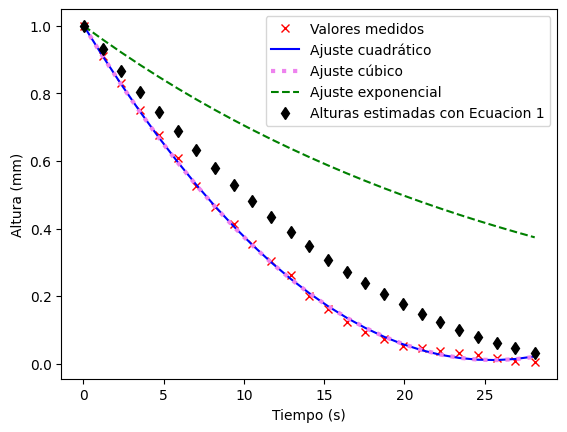

In [39]:
plt.plot(tiempos_aceite_6mm, alturas_normalizadas_aceite_6mm, 'x', color='red', label="Valores medidos")
plt.plot(tiempos_aceite_6mm, cuad_alturas_calculadas_normalizadas_aceite_6mm, color='blue', label="Ajuste cuadrático")
plt.plot(tiempos_aceite_6mm, cub_alturas_calculadas_normalizadas_aceite_6mm, color='violet', linestyle='dotted', label="Ajuste cúbico", linewidth=3)
plt.plot(tiempos_aceite_6mm, exp_alturas_calculadas_normalizadas_aceite_6mm, color='green', linestyle='--', label="Ajuste exponencial")
plt.plot(tiempos_aceite_6mm, altura_estimada_normalizada_aceite_6mm, 'd', color='black', label="Alturas estimadas con Ecuacion 1")
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (mm)')
plt.legend()
plt.show()